<a href="https://colab.research.google.com/github/Kumaraman26/TSP-Optimisation-project/blob/main/SGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGO Best Fitness: 1.1526581634944093e-135
PSO Best Fitness: 23272.38278781238


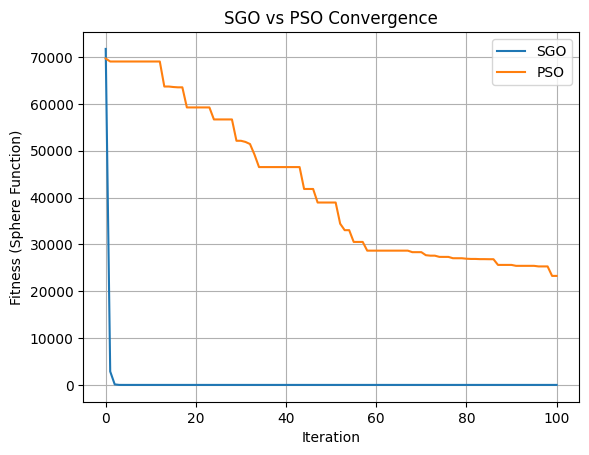

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: Sphere
def sphere(x):
    return np.sum(x ** 2)

# SGO Implementation
def sgo(objective_func, dim, pop_size, max_iter, bounds):
    c = 0.2
    lower_bound, upper_bound = bounds
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dim))
    fitness = np.array([objective_func(ind) for ind in population])
    gbest_idx = np.argmin(fitness)
    gbest = population[gbest_idx].copy()
    gbest_fitness = fitness[gbest_idx]
    fitness_history = [gbest_fitness]

    for _ in range(max_iter):
        # Improving Phase
        for i in range(pop_size):
            r = np.random.rand(dim)
            new_ind = c * population[i] + r * (gbest - population[i])
            new_ind = np.clip(new_ind, lower_bound, upper_bound)
            new_fitness = objective_func(new_ind)
            if new_fitness < fitness[i]:
                population[i] = new_ind
                fitness[i] = new_fitness

        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        # Acquiring Phase
        for i in range(pop_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            r_idx = np.random.randint(0, pop_size)
            while r_idx == i:
                r_idx = np.random.randint(0, pop_size)
            X_r = population[r_idx]
            if fitness[i] < fitness[r_idx]:
                new_ind = population[i] + r1 * (population[i] - X_r) + r2 * (gbest - population[i])
            else:
                new_ind = population[i] + r1 * (X_r - population[i]) + r2 * (gbest - population[i])
            new_ind = np.clip(new_ind, lower_bound, upper_bound)
            new_fitness = objective_func(new_ind)
            if new_fitness < fitness[i]:
                population[i] = new_ind
                fitness[i] = new_fitness

        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        fitness_history.append(gbest_fitness)

    return gbest, gbest_fitness, fitness_history

# PSO Implementation
def pso(objective_func, dim, pop_size, max_iter, bounds):
    w = 0.7    # Inertia weight
    c1 = 2.0   # Cognitive coefficient
    c2 = 2.0   # Social coefficient
    lower_bound, upper_bound = bounds

    # Initialize population and velocities
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dim))
    velocities = np.zeros((pop_size, dim))
    pbest = population.copy()
    fitness = np.array([objective_func(ind) for ind in population])
    pbest_fitness = fitness.copy()
    gbest_idx = np.argmin(fitness)
    gbest = population[gbest_idx].copy()
    gbest_fitness = fitness[gbest_idx]
    fitness_history = [gbest_fitness]

    for _ in range(max_iter):
        for i in range(pop_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            # Update velocity
            velocities[i] = (w * velocities[i] +
                            c1 * r1 * (pbest[i] - population[i]) +
                            c2 * r2 * (gbest - population[i]))
            # Update position
            population[i] += velocities[i]
            population[i] = np.clip(population[i], lower_bound, upper_bound)
            # Evaluate fitness
            new_fitness = objective_func(population[i])
            if new_fitness < pbest_fitness[i]:
                pbest[i] = population[i].copy()
                pbest_fitness[i] = new_fitness
                if new_fitness < gbest_fitness:
                    gbest = population[i].copy()
                    gbest_fitness = new_fitness

        fitness_history.append(gbest_fitness)

    return gbest, gbest_fitness, fitness_history

# Parameters
dim = 30
pop_size = 20
max_iter = 100
bounds = (-100, 100)

# Run SGO
sgo_best, sgo_fitness, sgo_history = sgo(sphere, dim, pop_size, max_iter, bounds)
print(f"SGO Best Fitness: {sgo_fitness}")

# Run PSO
pso_best, pso_fitness, pso_history = pso(sphere, dim, pop_size, max_iter, bounds)
print(f"PSO Best Fitness: {pso_fitness}")

# Plot convergence
plt.plot(sgo_history, label="SGO")
plt.plot(pso_history, label="PSO")
plt.xlabel("Iteration")
plt.ylabel("Fitness (Sphere Function)")
plt.title("SGO vs PSO Convergence")
plt.legend()
plt.grid(True)
plt.show()

Best Solution: [-6.96857015e-71 -7.23808562e-69 -1.08352655e-68  3.06041436e-69
 -9.84639066e-69  5.66413329e-69 -2.46379395e-71  1.09454129e-68
  1.57318148e-69 -1.25823022e-68 -3.46591323e-70 -3.78783589e-69
 -1.77763456e-69 -1.01348892e-68 -6.93472184e-69 -9.04047284e-69
 -2.29246449e-70  2.03042787e-69 -3.67285814e-69 -2.90554283e-69
  2.95464645e-69 -8.08773634e-69 -3.01558280e-69  4.52550436e-69
  2.06700562e-69 -7.72664827e-69 -3.54613318e-69  6.26913972e-69
  8.06413859e-69 -9.12135117e-69]
Best Fitness: 1.2328566313608564e-135


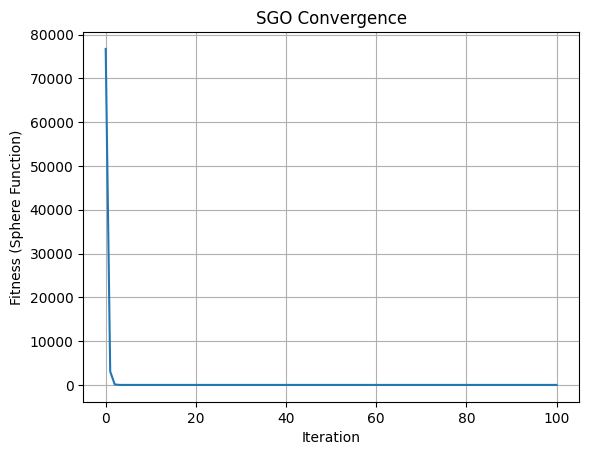

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: Sphere
def sphere(x):
    return np.sum(x ** 2)

# SGO Algorithm
def sgo(objective_func, dim, pop_size, max_iter, bounds):
    # Parameters
    c = 0.2  # Self-introspection factor
    lower_bound, upper_bound = bounds

    # Initialize population
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dim))
    fitness = np.array([objective_func(ind) for ind in population])
    gbest_idx = np.argmin(fitness)
    gbest = population[gbest_idx].copy()
    gbest_fitness = fitness[gbest_idx]

    # Track best fitness over iterations
    fitness_history = [gbest_fitness]

    # Main loop
    for iteration in range(max_iter):
        # Improving Phase
        for i in range(pop_size):
            r = np.random.rand(dim)
            new_ind = c * population[i] + r * (gbest - population[i])
            new_ind = np.clip(new_ind, lower_bound, upper_bound)  # Enforce bounds
            new_fitness = objective_func(new_ind)
            if new_fitness < fitness[i]:
                population[i] = new_ind
                fitness[i] = new_fitness

        # Update gbest
        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        # Acquiring Phase
        for i in range(pop_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            r_idx = np.random.randint(0, pop_size)
            while r_idx == i:  # Ensure r_idx != i
                r_idx = np.random.randint(0, pop_size)
            X_r = population[r_idx]

            if fitness[i] < fitness[r_idx]:
                new_ind = (population[i] + r1 * (population[i] - X_r) +
                          r2 * (gbest - population[i]))
            else:
                new_ind = (population[i] + r1 * (X_r - population[i]) +
                          r2 * (gbest - population[i]))

            new_ind = np.clip(new_ind, lower_bound, upper_bound)
            new_fitness = objective_func(new_ind)
            if new_fitness < fitness[i]:
                population[i] = new_ind
                fitness[i] = new_fitness

        # Update gbest again
        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        fitness_history.append(gbest_fitness)

    return gbest, gbest_fitness, fitness_history

# Parameters
dim = 30          # Number of dimensions
pop_size = 20     # Population size
max_iter = 100    # Maximum iterations
bounds = (-100, 100)  # Search space bounds

# Run SGO
best_solution, best_fitness, fitness_history = sgo(sphere, dim, pop_size, max_iter, bounds)

# Results
print(f"Best Solution: {best_solution}")
print(f"Best Fitness: {best_fitness}")

# Plot convergence
plt.plot(fitness_history)
plt.xlabel("Iteration")
plt.ylabel("Fitness (Sphere Function)")
plt.title("SGO Convergence")
plt.grid(True)
plt.show()

Best Tour: [50 10 51 13 12 26 25 46 27 32 14  3 24  5 42  9  8  7 40 18 44 31 21 48
 38 47 37  4 23 36 39 35 19 49 28 15 29  1 41  6 20 16  2 17 30 22  0 43
 34 33 45 11]
Best Tour Length: 9690.81 (Optimal: 7542)


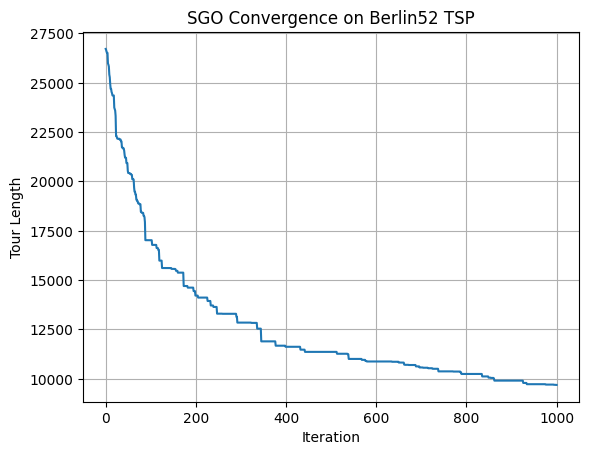

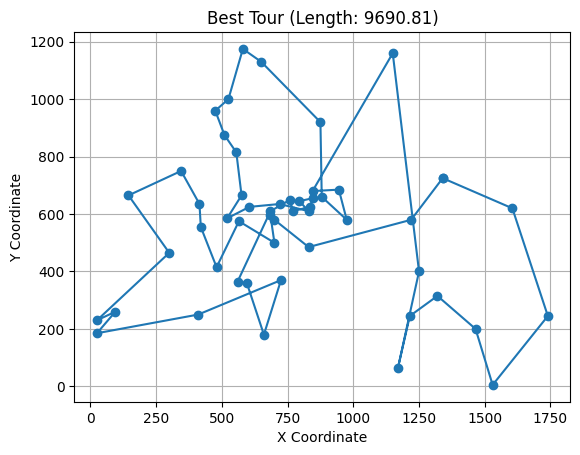

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Berlin52 coordinates (parsed from berlin52.tsp)
berlin52_coords = [
    [565.0, 575.0], [25.0, 185.0], [345.0, 750.0], [945.0, 685.0], [845.0, 655.0],
    [880.0, 660.0], [25.0, 230.0], [525.0, 1000.0], [580.0, 1175.0], [650.0, 1130.0],
    [1605.0, 620.0], [1220.0, 580.0], [1465.0, 200.0], [1530.0, 5.0], [845.0, 680.0],
    [725.0, 370.0], [145.0, 665.0], [415.0, 635.0], [510.0, 875.0], [560.0, 365.0],
    [300.0, 465.0], [520.0, 585.0], [480.0, 415.0], [835.0, 625.0], [975.0, 580.0],
    [1215.0, 245.0], [1320.0, 315.0], [1250.0, 400.0], [660.0, 180.0], [410.0, 250.0],
    [420.0, 555.0], [575.0, 665.0], [1150.0, 1160.0], [700.0, 580.0], [685.0, 595.0],
    [685.0, 610.0], [770.0, 610.0], [795.0, 645.0], [720.0, 635.0], [760.0, 650.0],
    [475.0, 960.0], [95.0, 260.0], [875.0, 920.0], [700.0, 500.0], [555.0, 815.0],
    [830.0, 485.0], [1170.0, 65.0], [830.0, 610.0], [605.0, 625.0], [595.0, 360.0],
    [1340.0, 725.0], [1740.0, 245.0]
]

# Calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Compute total tour distance
def tour_distance(tour, coords):
    total = 0
    for i in range(len(tour) - 1):
        total += euclidean_distance(coords[tour[i]], coords[tour[i + 1]])
    total += euclidean_distance(coords[tour[-1]], coords[tour[0]])  # Return to start
    return total

# 2-opt swap for local improvement
def two_opt(tour, i, j):
    new_tour = tour.copy()
    new_tour[i:j + 1] = new_tour[i:j + 1][::-1]  # Reverse segment
    return new_tour

# SGO for TSP
def sgo_tsp(coords, pop_size=20, max_iter=100):
    n_cities = len(coords)
    c = 0.2  # Self-introspection factor

    # Initialize population with random permutations
    population = [np.random.permutation(n_cities) for _ in range(pop_size)]
    fitness = [tour_distance(ind, coords) for ind in population]
    gbest_idx = np.argmin(fitness)
    gbest = population[gbest_idx].copy()
    gbest_fitness = fitness[gbest_idx]
    fitness_history = [gbest_fitness]

    for iteration in range(max_iter):
        # Improving Phase: Move toward gbest with 2-opt inspired by gbest
        for i in range(pop_size):
            ind = population[i].copy()
            r = np.random.rand()
            if r < c:  # Retain some original traits
                continue
            # Pick two random points and try a 2-opt move toward gbest
            i1, i2 = np.random.choice(n_cities, 2, replace=False)
            i1, i2 = min(i1, i2), max(i1, i2)
            new_ind = two_opt(ind, i1, i2)
            new_fitness = tour_distance(new_ind, coords)
            if new_fitness < fitness[i]:
                population[i] = new_ind
                fitness[i] = new_fitness

        # Update gbest
        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        # Acquiring Phase: Learn from a random peer and gbest
        for i in range(pop_size):
            r1, r2 = np.random.rand(), np.random.rand()
            r_idx = np.random.randint(0, pop_size)
            while r_idx == i:
                r_idx = np.random.randint(0, pop_size)
            X_r = population[r_idx]

            ind = population[i].copy()
            # Swap two positions based on peer and gbest
            if fitness[i] < fitness[r_idx]:
                i1 = np.random.randint(0, n_cities)
                i2 = np.argmin([euclidean_distance(coords[ind[i1]], coords[gbest[j]]) for j in range(n_cities)])
            else:
                i1 = np.random.randint(0, n_cities)
                i2 = np.argmin([euclidean_distance(coords[ind[i1]], coords[X_r[j]]) for j in range(n_cities)])

            ind[i1], ind[i2] = ind[i2], ind[i1]
            new_fitness = tour_distance(ind, coords)
            if new_fitness < fitness[i]:
                population[i] = ind
                fitness[i] = new_fitness

        # Update gbest again
        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        fitness_history.append(gbest_fitness)

    return gbest, gbest_fitness, fitness_history

# Run SGO on Berlin52
best_tour, best_fitness, fitness_history = sgo_tsp(berlin52_coords, pop_size=20, max_iter=1000)

# Results
print(f"Best Tour: {best_tour}")
print(f"Best Tour Length: {best_fitness:.2f} (Optimal: 7542)")

# Plot convergence
plt.plot(fitness_history)
plt.xlabel("Iteration")
plt.ylabel("Tour Length")
plt.title("SGO Convergence on Berlin52 TSP")
plt.grid(True)
plt.show()

# Plot the best tour
x = [berlin52_coords[i][0] for i in best_tour] + [berlin52_coords[best_tour[0]][0]]
y = [berlin52_coords[i][1] for i in best_tour] + [berlin52_coords[best_tour[0]][1]]
plt.plot(x, y, 'o-')
plt.title(f"Best Tour (Length: {best_fitness:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Please upload the Berlin52 dataset file (e.g., berlin52.tsp or a CSV with x,y coordinates):


Saving berlin52.tsp to berlin52 (4).tsp
Loaded 52 coordinates from berlin52 (4).tsp
Best Tour: [43 49 28 15 45 33 34 35 38 36 39  4 14  5 50 11 27 25 12 26 10 51 13 46
 24 47 37 23  3 42 32  9  8 40  7 17 30 22 19 29  1  6 41 20 16  2 44 18
 31 21  0 48]
Best Tour Length: 9607.53 (Optimal: 7542)
Percentage Deviation from Optimal: 27.39%


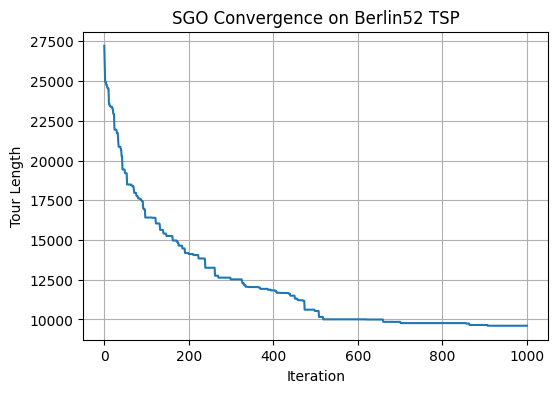

Animation saved as 'sgo_tsp_berlin52.gif' with 102 frames.


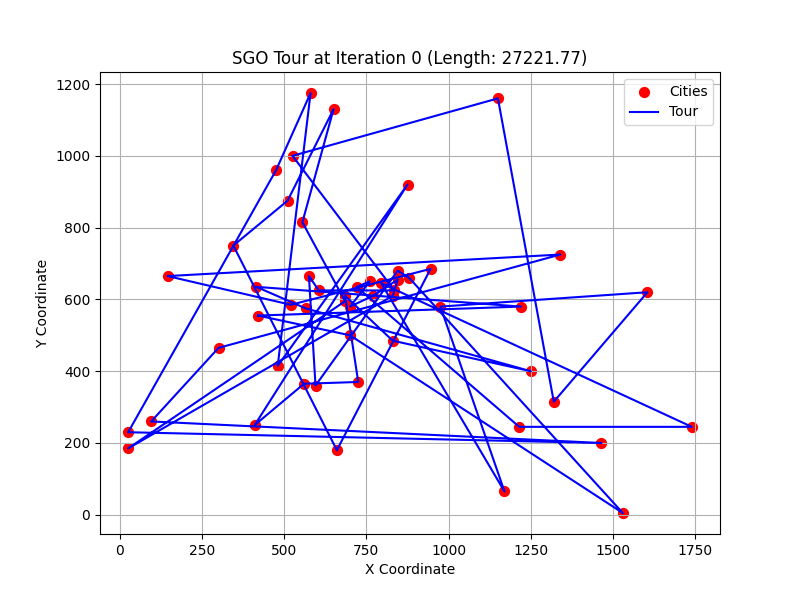

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib.animation import FuncAnimation
from google.colab import files
from IPython.display import Image, display

# Install FFmpeg
!apt-get install ffmpeg -y

# Upload the dataset file
print("Please upload the Berlin52 dataset file (e.g., berlin52.tsp or a CSV with x,y coordinates):")
uploaded = files.upload()

# Function to parse coordinates from a TSPLIB .tsp file or CSV
def load_coordinates(filename):
    coords = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        # Check if it's a TSPLIB .tsp file
        if any("NODE_COORD_SECTION" in line for line in lines):
            start = False
            for line in lines:
                line = line.strip()
                if "NODE_COORD_SECTION" in line:
                    start = True
                    continue
                if "EOF" in line or line == "":
                    break
                if start:
                    parts = line.split()
                    if len(parts) >= 3:  # Expecting node number, x, y
                        x, y = float(parts[1]), float(parts[2])
                        coords.append([x, y])
        else:  # Assume CSV format (x,y per line)
            for line in lines:
                line = line.strip()
                if line:
                    x, y = map(float, line.split(','))
                    coords.append([x, y])
    return coords

# Load the uploaded file (assumes single file upload)
filename = list(uploaded.keys())[0]
berlin52_coords = load_coordinates(filename)
print(f"Loaded {len(berlin52_coords)} coordinates from {filename}")

# Calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Compute total tour distance
def tour_distance(tour, coords):
    total = 0
    for i in range(len(tour) - 1):
        total += euclidean_distance(coords[tour[i]], coords[tour[i + 1]])
    total += euclidean_distance(coords[tour[-1]], coords[tour[0]])  # Return to start
    return total

# 2-opt swap for local improvement
def two_opt(tour, i, j):
    new_tour = tour.copy()
    new_tour[i:j + 1] = new_tour[i:j + 1][::-1]  # Reverse segment
    return new_tour

# SGO for TSP
def sgo_tsp(coords, pop_size=20, max_iter=1000, sample_interval=10):
    n_cities = len(coords)
    c = 0.2  # Self-introspection factor

    # Initialize population with random permutations
    population = [np.random.permutation(n_cities) for _ in range(pop_size)]
    fitness = [tour_distance(ind, coords) for ind in population]
    gbest_idx = np.argmin(fitness)
    gbest = population[gbest_idx].copy()
    gbest_fitness = fitness[gbest_idx]
    fitness_history = [gbest_fitness]
    tour_history = [gbest.copy()]  # Store best tour at sampled iterations

    for iteration in range(max_iter):
        # Improving Phase: Move toward gbest with 2-opt inspired by gbest
        for i in range(pop_size):
            ind = population[i].copy()
            r = np.random.rand()
            if r < c:  # Retain some original traits
                continue
            # Pick two random points and try a 2-opt move toward gbest
            i1, i2 = np.random.choice(n_cities, 2, replace=False)
            i1, i2 = min(i1, i2), max(i1, i2)
            new_ind = two_opt(ind, i1, i2)
            new_fitness = tour_distance(new_ind, coords)
            if new_fitness < fitness[i]:
                population[i] = new_ind
                fitness[i] = new_fitness

        # Update gbest
        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        # Acquiring Phase: Learn from a random peer and gbest
        for i in range(pop_size):
            r1, r2 = np.random.rand(), np.random.rand()
            r_idx = np.random.randint(0, pop_size)
            while r_idx == i:
                r_idx = np.random.randint(0, pop_size)
            X_r = population[r_idx]

            ind = population[i].copy()
            # Swap two positions based on peer and gbest
            if fitness[i] < fitness[r_idx]:
                i1 = np.random.randint(0, n_cities)
                i2 = np.argmin([euclidean_distance(coords[ind[i1]], coords[gbest[j]]) for j in range(n_cities)])
            else:
                i1 = np.random.randint(0, n_cities)
                i2 = np.argmin([euclidean_distance(coords[ind[i1]], coords[X_r[j]]) for j in range(n_cities)])

            ind[i1], ind[i2] = ind[i2], ind[i1]
            new_fitness = tour_distance(ind, coords)
            if new_fitness < fitness[i]:
                population[i] = ind
                fitness[i] = new_fitness

        # Update gbest again
        gbest_idx = np.argmin(fitness)
        if fitness[gbest_idx] < gbest_fitness:
            gbest = population[gbest_idx].copy()
            gbest_fitness = fitness[gbest_idx]

        # Store best tour and fitness at sampled intervals
        fitness_history.append(gbest_fitness)
        if iteration % sample_interval == 0 or iteration == max_iter - 1:
            tour_history.append(gbest.copy())

    return gbest, gbest_fitness, fitness_history, tour_history

# Run SGO
sample_interval = 10  # Store tour every 10 iterations
best_tour, best_fitness, fitness_history, tour_history = sgo_tsp(
    berlin52_coords, pop_size=20, max_iter=1000, sample_interval=sample_interval
)

# Calculate percentage deviation from optimal solution
optimal_length = 7542
percentage_deviation = ((best_fitness - optimal_length) / optimal_length) * 100

# Results
print(f"Best Tour: {best_tour}")
print(f"Best Tour Length: {best_fitness:.2f} (Optimal: {optimal_length})")
print(f"Percentage Deviation from Optimal: {percentage_deviation:.2f}%")

# Plot convergence
plt.figure(figsize=(6, 4))
plt.plot(fitness_history)
plt.xlabel("Iteration")
plt.ylabel("Tour Length")
plt.title("SGO Convergence on Berlin52 TSP")
plt.grid(True)
plt.show()

# Set up animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("SGO Tour Evolution on Berlin52 TSP")
ax.grid(True)

# Plot cities as points
x_coords = [coord[0] for coord in berlin52_coords]
y_coords = [coord[1] for coord in berlin52_coords]
ax.scatter(x_coords, y_coords, c='red', s=50, label='Cities')

# Initialize line for tour
line, = ax.plot([], [], 'b-', label='Tour')
ax.legend()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    tour = tour_history[i]
    x = [berlin52_coords[j][0] for j in tour] + [berlin52_coords[tour[0]][0]]
    y = [berlin52_coords[j][1] for j in tour] + [berlin52_coords[tour[0]][1]]
    line.set_data(x, y)
    # Calculate the corresponding iteration number
    iter_num = i * sample_interval if i < len(tour_history) - 1 else len(fitness_history) - 1
    ax.set_title(f"SGO Tour at Iteration {iter_num} (Length: {fitness_history[iter_num]:.2f})")
    return line,

# Create animation and save as GIF
ani = FuncAnimation(fig, animate, init_func=init, frames=len(tour_history), interval=200, blit=True)
ani.save('sgo_tsp_berlin52.gif', writer='pillow', fps=10)
print(f"Animation saved as 'sgo_tsp_berlin52.gif' with {len(tour_history)} frames.")
display(Image(filename='sgo_tsp_berlin52.gif'))  # Display GIF in Colab
plt.close()  # Close the figure to prevent static display

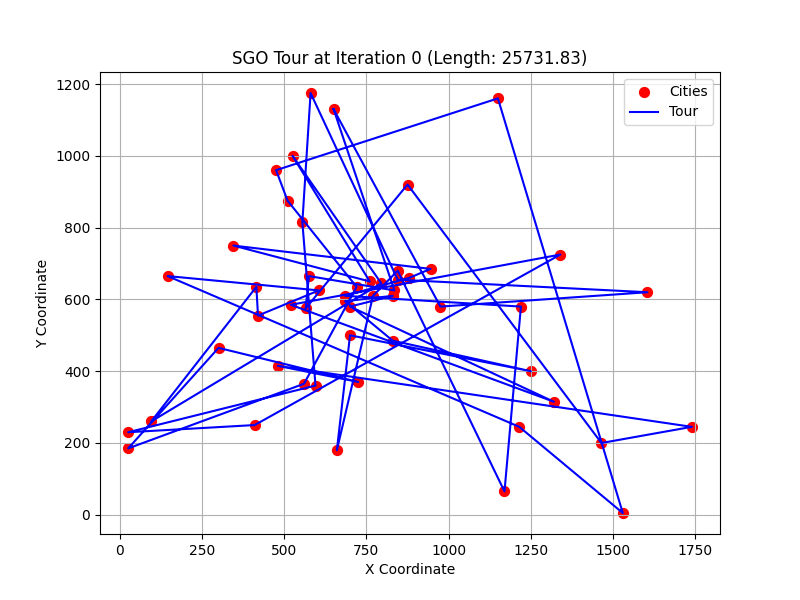

In [ ]:
from IPython.display import Image
Image(filename='sgo_tsp_berlin52.gif')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Please upload the Berlin52 dataset file (e.g., berlin52.tsp or a CSV with x,y coordinates):


Saving berlin52.tsp to berlin52 (6).tsp
Loaded 52 coordinates from berlin52 (6).tsp
Initial Fitness: 27200.11, Final Fitness: 20134.36
Best Tour Length: 20134.36 (Optimal: 7542)
Deviation from Optimal Solution: 166.96%
Parameters: w=0.6, c1=2.0, c2=2.0


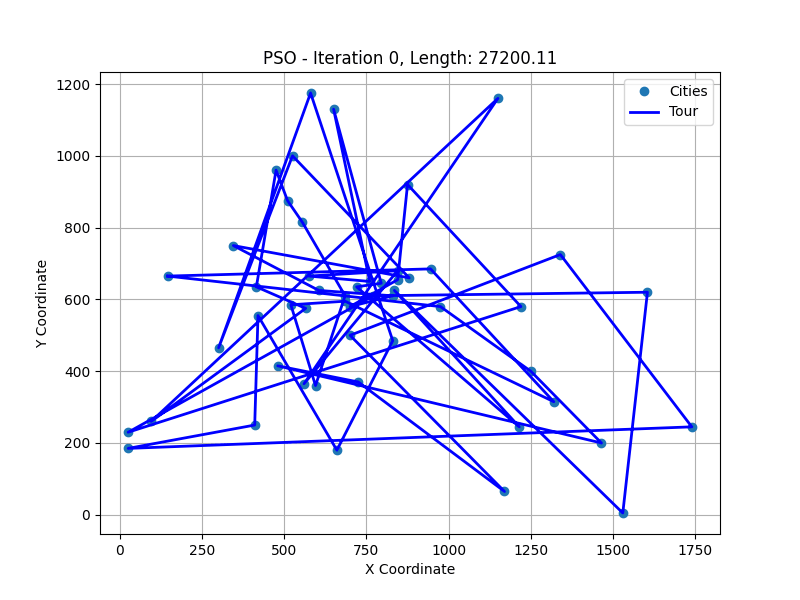

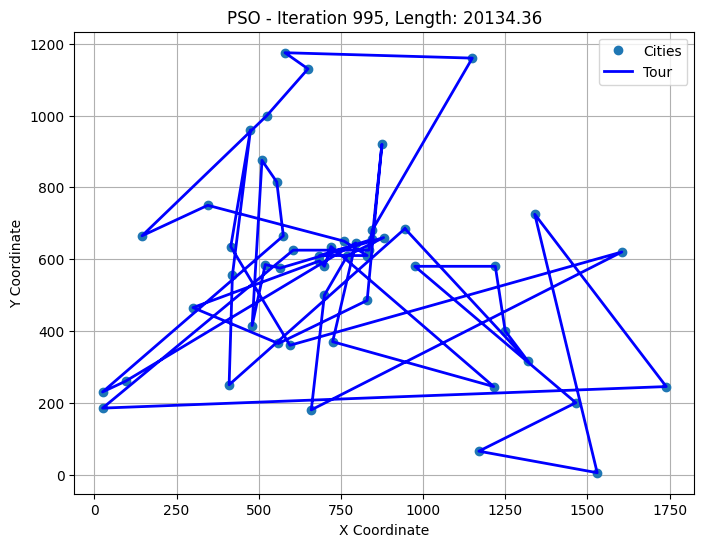

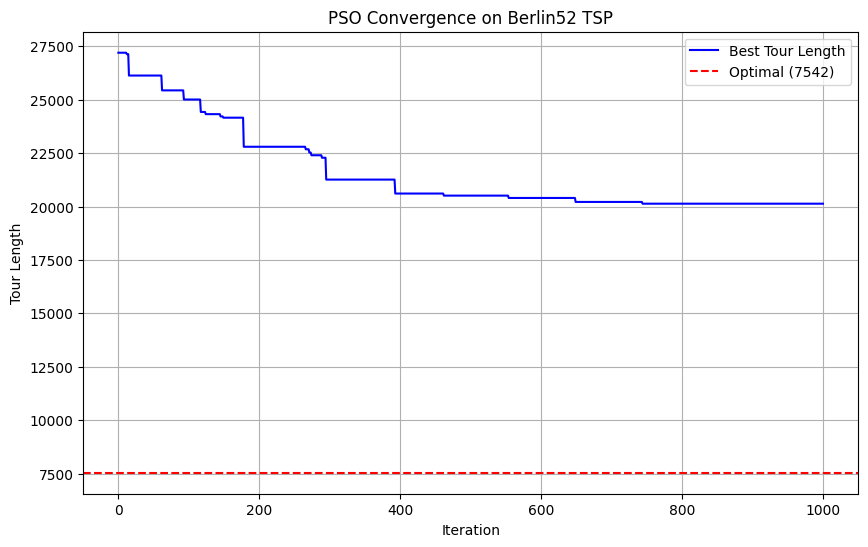

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display
import random
from google.colab import files

# Install FFmpeg
!apt-get install ffmpeg -y

# Upload the dataset file
print("Please upload the Berlin52 dataset file (e.g., berlin52.tsp or a CSV with x,y coordinates):")
uploaded = files.upload()

# Function to parse coordinates from a TSPLIB .tsp file or CSV
def load_coordinates(filename):
    coords = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        # Check if it's a TSPLIB .tsp file
        if any("NODE_COORD_SECTION" in line for line in lines):
            start = False
            for line in lines:
                line = line.strip()
                if "NODE_COORD_SECTION" in line:
                    start = True
                    continue
                if "EOF" in line or line == "":
                    break
                if start:
                    parts = line.split()
                    if len(parts) >= 3:  # Expecting node number, x, y
                        x, y = float(parts[1]), float(parts[2])
                        coords.append([x, y])
        else:  # Assume CSV format (x,y per line)
            for line in lines:
                line = line.strip()
                if line:
                    x, y = map(float, line.split(','))
                    coords.append([x, y])
    return coords

# Load the uploaded file (assumes single file upload)
filename = list(uploaded.keys())[0]
berlin52_coords = load_coordinates(filename)
print(f"Loaded {len(berlin52_coords)} coordinates from {filename}")

# Distance functions
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def tour_distance(tour, coords):
    total = 0
    for i in range(len(tour) - 1):
        total += euclidean_distance(coords[tour[i]], coords[tour[i + 1]])
    total += euclidean_distance(coords[tour[-1]], coords[tour[0]])
    return total

# PSO for TSP with improved swap logic
def pso_tsp(coords, N=30, max_iter=1000, w=0.6, c1=2.0, c2=2.0):
    n_cities = len(coords)
    particles = [random.sample(range(n_cities), n_cities) for _ in range(N)]
    velocities = [np.random.uniform(-1, 1, n_cities) for _ in range(N)]
    pbest = [p[:] for p in particles]
    pbest_fitness = [tour_distance(p, coords) for p in particles]
    gbest_idx = np.argmin(pbest_fitness)
    gbest = pbest[gbest_idx][:]
    gbest_fitness = pbest_fitness[gbest_idx]
    fitness_history = [gbest_fitness]
    tour_history = [gbest[:]]

    for iteration in range(max_iter):
        for i in range(N):
            r1, r2 = np.random.rand(n_cities), np.random.rand(n_cities)
            cognitive = c1 * r1 * np.array([pbest[i].index(j) - particles[i].index(j)
                                            for j in range(n_cities)])
            social = c2 * r2 * np.array([gbest.index(j) - particles[i].index(j)
                                         for j in range(n_cities)])
            velocities[i] = w * velocities[i] + cognitive + social
            velocities[i] = np.clip(velocities[i], -n_cities, n_cities)  # Bound velocity

            # Single directed swap toward pbest or gbest
            new_particle = particles[i][:]
            v_sum = np.sum(np.abs(velocities[i]))
            if v_sum > 0:
                probs = np.abs(velocities[i]) / v_sum
                idx = np.random.choice(n_cities, p=probs)  # City to move
                target_idx = pbest[i].index(particles[i][idx]) if random.random() < 0.5 else gbest.index(particles[i][idx])
                if idx != target_idx:
                    new_particle[idx], new_particle[target_idx] = new_particle[target_idx], new_particle[idx]

            new_fitness = tour_distance(new_particle, coords)
            particles[i] = new_particle[:]
            if new_fitness < pbest_fitness[i]:
                pbest[i] = new_particle[:]
                pbest_fitness[i] = new_fitness
                if new_fitness < gbest_fitness:
                    gbest = new_particle[:]
                    gbest_fitness = new_fitness

        fitness_history.append(gbest_fitness)
        if iteration % 5 == 0 and iteration != 0:
            tour_history.append(gbest[:])

    # Debugging output
    print(f"Initial Fitness: {fitness_history[0]:.2f}, Final Fitness: {gbest_fitness:.2f}")
    return gbest, gbest_fitness, tour_history, fitness_history

# Parameters
w, c1, c2 = 0.6, 2.0, 2.0
optimal_solution = 7542  # Known optimal for Berlin52

# Run PSO
best_tour, best_fitness, tour_history, fitness_history = pso_tsp(berlin52_coords, N=30, max_iter=1000, w=w, c1=c1, c2=c2)
deviation_percent = ((best_fitness - optimal_solution) / optimal_solution) * 100
print(f"Best Tour Length: {best_fitness:.2f} (Optimal: {optimal_solution})")
print(f"Deviation from Optimal Solution: {deviation_percent:.2f}%")
print(f"Parameters: w={w}, c1={c1}, c2={c2}")

# Animation
fig, ax = plt.subplots(figsize=(8, 6))
x = [berlin52_coords[i][0] for i in range(len(berlin52_coords))]
y = [berlin52_coords[i][1] for i in range(len(berlin52_coords))]
ax.plot(x, y, 'o', label="Cities")
line, = ax.plot([], [], 'b-', lw=2, label="Tour")
ax.set_title("PSO Solving Berlin52 TSP")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.legend()
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    tour = tour_history[frame]
    x_tour = [berlin52_coords[i][0] for i in tour] + [berlin52_coords[tour[0]][0]]
    y_tour = [berlin52_coords[i][1] for i in tour] + [berlin52_coords[tour[0]][1]]
    line.set_data(x_tour, y_tour)
    ax.set_title(f"PSO - Iteration {frame*5}, Length: {tour_distance(tour, berlin52_coords):.2f}")
    return line,

ani = FuncAnimation(fig, update, frames=range(len(tour_history)), init_func=init, blit=True, interval=200)
ani.save('pso_tsp_animation.gif', writer='pillow', fps=5)
display(Image(filename='pso_tsp_animation.gif'))

# Convergence plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(fitness_history)), fitness_history, 'b-', label='Best Tour Length')
plt.axhline(y=optimal_solution, color='r', linestyle='--', label=f'Optimal ({optimal_solution})')
plt.xlabel('Iteration')
plt.ylabel('Tour Length')
plt.title('PSO Convergence on Berlin52 TSP')
plt.legend()
plt.grid(True)
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Iteration 1: Best Distance = 25708.01
Iteration 2: Best Distance = 25372.74
Iteration 3: Best Distance = 25372.74
Iteration 4: Best Distance = 25372.74
Iteration 5: Best Distance = 25372.74
Iteration 6: Best Distance = 25372.74
Iteration 7: Best Distance = 25372.74
Iteration 8: Best Distance = 25372.74
Iteration 9: Best Distance = 23978.38
Iteration 10: Best Distance = 23978.38
Iteration 11: Best Distance = 23978.38
Iteration 12: Best Distance = 23978.38
Iteration 13: Best Distance = 23978.38
Iteration 14: Best Distance = 23978.38
Iteration 15: Best Distance = 23978.38
Iteration 16: Best Distance = 23978.38
Iteration 17: Best Distance = 23978.38
Iteration 18: Best Distance = 23978.38
Iteration 19: Best Distance = 23978.38
Iteration 20: Best Distance = 23978.38
Ite

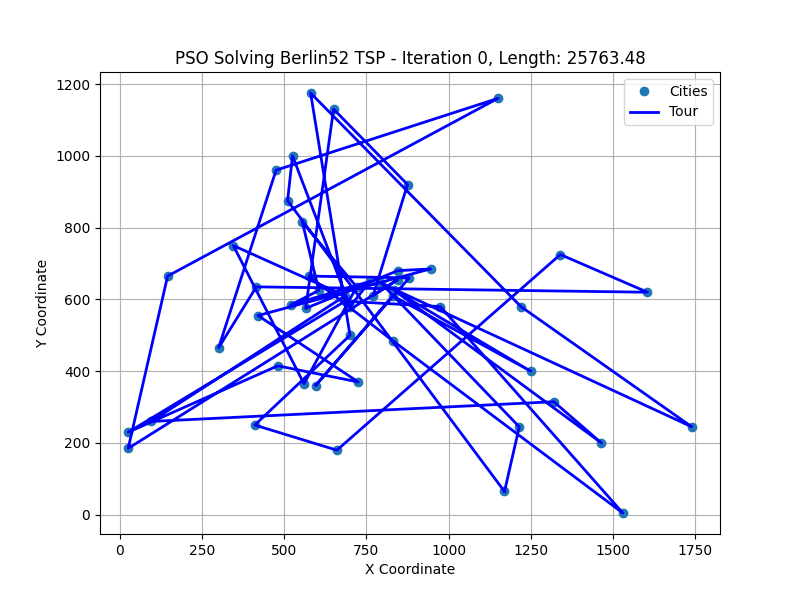

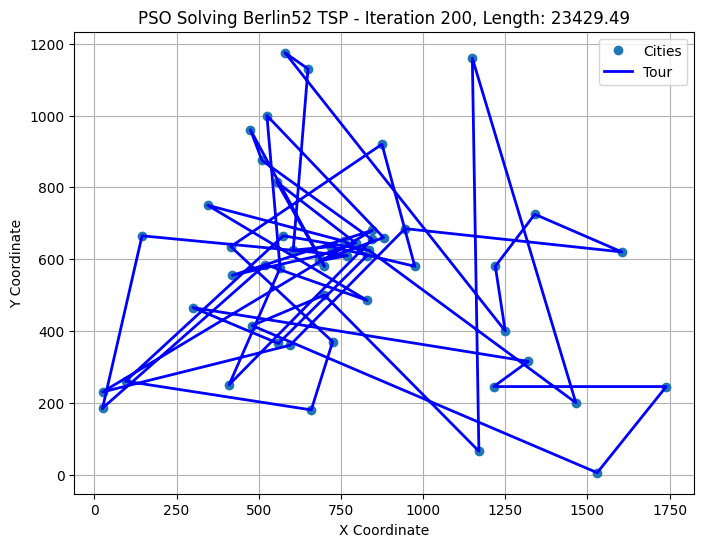

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import matplotlib.animation as animation

# Install FFmpeg (just in case)
!apt-get install ffmpeg -y

# Berlin52 coordinates
city_list = [
    [565.0, 575.0], [25.0, 185.0], [345.0, 750.0], [945.0, 685.0], [845.0, 655.0],
    [880.0, 660.0], [25.0, 230.0], [525.0, 1000.0], [580.0, 1175.0], [650.0, 1130.0],
    [1605.0, 620.0], [1220.0, 580.0], [1465.0, 200.0], [1530.0, 5.0], [845.0, 680.0],
    [725.0, 370.0], [145.0, 665.0], [415.0, 635.0], [510.0, 875.0], [560.0, 365.0],
    [300.0, 465.0], [520.0, 585.0], [480.0, 415.0], [835.0, 625.0], [975.0, 580.0],
    [1215.0, 245.0], [1320.0, 315.0], [1250.0, 400.0], [660.0, 180.0], [410.0, 250.0],
    [420.0, 555.0], [575.0, 665.0], [1150.0, 1160.0], [700.0, 580.0], [685.0, 595.0],
    [685.0, 610.0], [770.0, 610.0], [795.0, 645.0], [720.0, 635.0], [760.0, 650.0],
    [475.0, 960.0], [95.0, 260.0], [875.0, 920.0], [700.0, 500.0], [555.0, 815.0],
    [830.0, 485.0], [1170.0, 65.0], [830.0, 610.0], [605.0, 625.0], [595.0, 360.0],
    [1340.0, 725.0], [1740.0, 245.0]
]

# Compute distance matrix
num_cities = len(city_list)
dist_matrix = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        dist_matrix[i, j] = np.sqrt((city_list[i][0] - city_list[j][0])**2 +
                                    (city_list[i][1] - city_list[j][1])**2)

# Define total distance function for TSP
def total_distance(route, dist_matrix):
    return sum(dist_matrix[route[i], route[i+1]] for i in range(len(route)-1)) + dist_matrix[route[-1], route[0]]

# Swap function to modify particle routes
def swap_operator(route):
    i, j = random.sample(range(len(route)), 2)
    route[i], route[j] = route[j], route[i]
    return route

# PSO Parameters
num_particles = 100  # Number of solutions (routes)
num_iterations = 200  # More iterations for better optimization
w = 0.6  # Inertia weight
c1 = 2  # Cognitive weight
c2 = 2  # Social weight

# Initialize particle swarm
particles = [random.sample(range(num_cities), num_cities) for _ in range(num_particles)]
personal_best = [p[:] for p in particles]  # Deep copy
personal_best_scores = [total_distance(p, dist_matrix) for p in particles]
global_best, global_best_route = min(zip(personal_best_scores, personal_best))
global_best_route = global_best_route[:]  # Ensure deep copy
tour_history = [global_best_route[:]]  # Store history for animation

# Run PSO algorithm
for iteration in range(num_iterations):
    for i in range(num_particles):
        new_particle = swap_operator(particles[i][:])  # Deep copy to avoid modifying original
        new_score = total_distance(new_particle, dist_matrix)

        if new_score < personal_best_scores[i]:  # Update personal best
            personal_best[i] = new_particle[:]
            personal_best_scores[i] = new_score

        if new_score < global_best:  # Update global best
            global_best = new_score
            global_best_route = new_particle[:]

        # Update velocity (swap probability)
        swap_probability = w * random.random() + c1 * random.random() + c2 * random.random()
        if random.random() < swap_probability:
            particles[i] = swap_operator(particles[i][:])

    # Store global best route every 5 iterations for animation
    if iteration % 5 == 0:
        tour_history.append(global_best_route[:])

    print(f"Iteration {iteration+1}: Best Distance = {global_best:.2f}")

# Print final best solution
print("Best Route:", global_best_route)
print("Best Distance:", global_best)

# Animation setup
fig, ax = plt.subplots(figsize=(8, 6))
x = [city_list[i][0] for i in range(num_cities)]
y = [city_list[i][1] for i in range(num_cities)]
ax.plot(x, y, 'o', label="Cities")
line, = ax.plot([], [], 'b-', lw=2, label="Tour")
ax.set_title("PSO Solving Berlin52 TSP")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.legend()
ax.grid(True)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation update function
def update(frame):
    tour = tour_history[frame]
    x_tour = [city_list[i][0] for i in tour] + [city_list[tour[0]][0]]
    y_tour = [city_list[i][1] for i in tour] + [city_list[tour[0]][1]]
    line.set_data(x_tour, y_tour)
    ax.set_title(f"PSO Solving Berlin52 TSP - Iteration {frame*5}, Length: {total_distance(tour, dist_matrix):.2f}")
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=range(len(tour_history)), init_func=init, blit=True, interval=200)

# Save animation as GIF
ani.save('pso_tsp_animation.gif', writer='pillow', fps=5)

# Display GIF in Colab
Image(filename='pso_tsp_animation.gif')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
=== SGO Results ===
Best Tour Length: 15742.27 (Optimal: 7542)
Deviation from Optimal: 108.73%

=== PSO Results ===
Best Tour Length: 25147.72 (Optimal: 7542)
Deviation from Optimal: 233.44%
Parameters: w=0.6, c1=2.0, c2=2.0

SGO Animation:


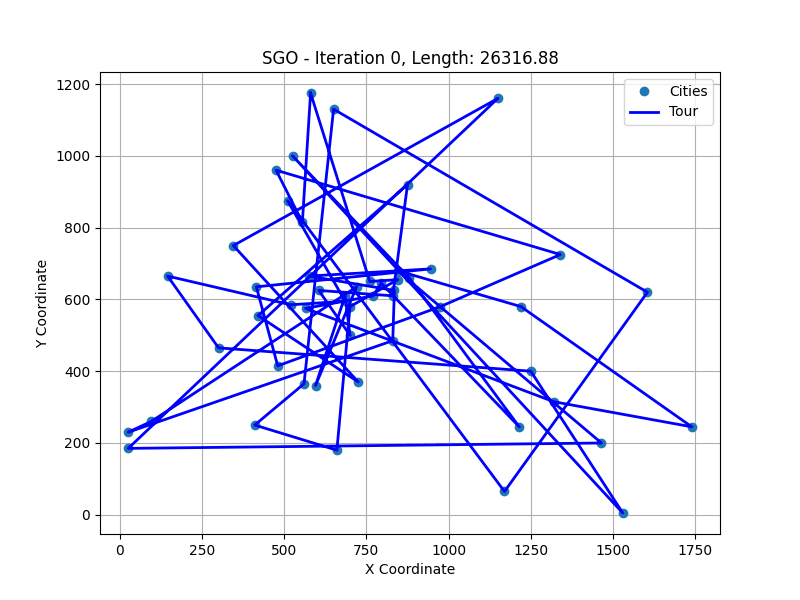


PSO Animation:


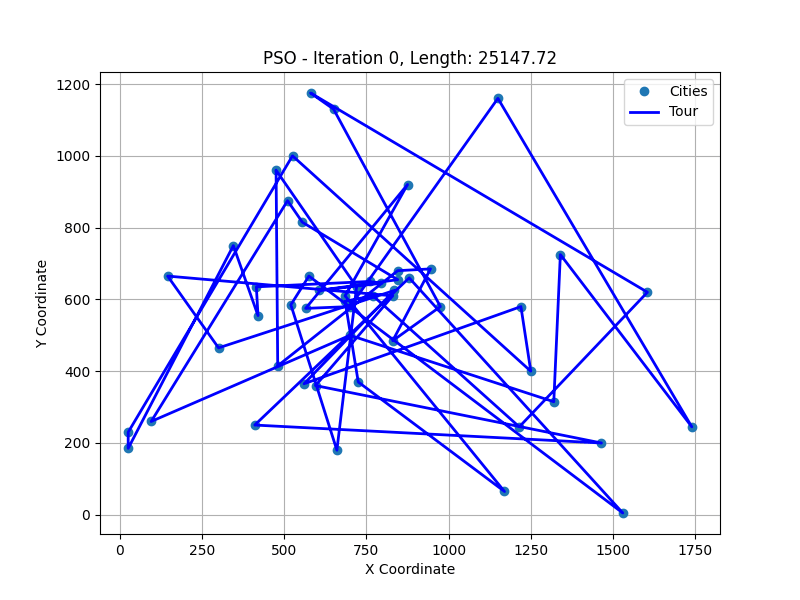

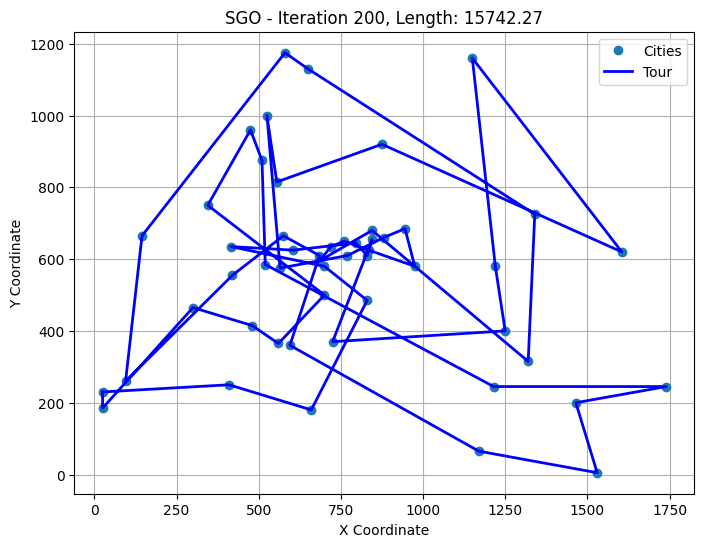

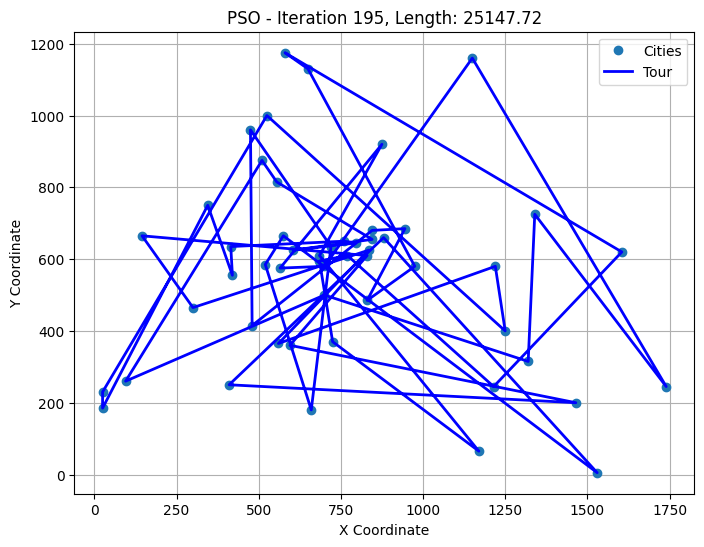

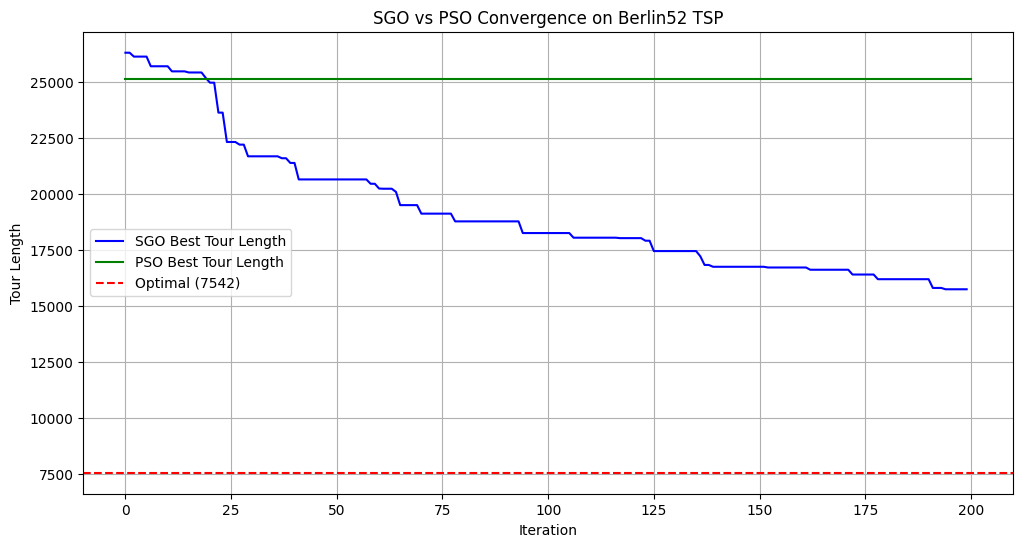

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display
import random

# Install FFmpeg for animation in Colab
!apt-get install ffmpeg -y

# Berlin52 coordinates from TSPLIB
berlin52_coords = [
    [565.0, 575.0], [25.0, 185.0], [345.0, 750.0], [945.0, 685.0], [845.0, 655.0],
    [880.0, 660.0], [25.0, 230.0], [525.0, 1000.0], [580.0, 1175.0], [650.0, 1130.0],
    [1605.0, 620.0], [1220.0, 580.0], [1465.0, 200.0], [1530.0, 5.0], [845.0, 680.0],
    [725.0, 370.0], [145.0, 665.0], [415.0, 635.0], [510.0, 875.0], [560.0, 365.0],
    [300.0, 465.0], [520.0, 585.0], [480.0, 415.0], [835.0, 625.0], [975.0, 580.0],
    [1215.0, 245.0], [1320.0, 315.0], [1250.0, 400.0], [660.0, 180.0], [410.0, 250.0],
    [420.0, 555.0], [575.0, 665.0], [1150.0, 1160.0], [700.0, 580.0], [685.0, 595.0],
    [685.0, 610.0], [770.0, 610.0], [795.0, 645.0], [720.0, 635.0], [760.0, 650.0],
    [475.0, 960.0], [95.0, 260.0], [875.0, 920.0], [700.0, 500.0], [555.0, 815.0],
    [830.0, 485.0], [1170.0, 65.0], [830.0, 610.0], [605.0, 625.0], [595.0, 360.0],
    [1340.0, 725.0], [1740.0, 245.0]
]

# Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Tour distance (fitness function)
def tour_distance(tour, coords):
    total = 0
    for i in range(len(tour) - 1):
        total += euclidean_distance(coords[tour[i]], coords[tour[i + 1]])
    total += euclidean_distance(coords[tour[-1]], coords[tour[0]])  # Closed path
    return total

# Swap operator for SGO
def swap_operator(route):
    i, j = random.sample(range(len(route)), 2)
    route[i], route[j] = route[j], route[i]
    return route

# SGO (Swap-Operator-based PSO)
def sgo_tsp(coords, N=20, max_iter=200):
    n_cities = len(coords)
    particles = [random.sample(range(n_cities), n_cities) for _ in range(N)]
    pbest = [p[:] for p in particles]
    pbest_fitness = [tour_distance(p, coords) for p in particles]
    gbest_idx = np.argmin(pbest_fitness)
    gbest = pbest[gbest_idx][:]
    gbest_fitness = pbest_fitness[gbest_idx]
    fitness_history = [gbest_fitness]
    tour_history = [gbest[:]]

    for iteration in range(max_iter - 1):
        for i in range(N):
            new_particle = swap_operator(particles[i][:])
            new_fitness = tour_distance(new_particle, coords)
            if new_fitness < pbest_fitness[i]:
                pbest[i] = new_particle[:]
                pbest_fitness[i] = new_fitness
                if new_fitness < gbest_fitness:
                    gbest = new_particle[:]
                    gbest_fitness = new_fitness
        particles = [p[:] for p in pbest]
        fitness_history.append(gbest_fitness)
        if iteration % 5 == 0:
            tour_history.append(gbest[:])

    return gbest, gbest_fitness, tour_history, fitness_history

# PSO (Velocity-based PSO)
def pso_tsp(coords, N=20, max_iter=200, w=0.6, c1=2.0, c2=2.0):
    n_cities = len(coords)
    particles = [random.sample(range(n_cities), n_cities) for _ in range(N)]
    velocities = [np.random.uniform(-1, 1, n_cities) for _ in range(N)]
    pbest = [p[:] for p in particles]
    pbest_fitness = [tour_distance(p, coords) for p in particles]
    gbest_idx = np.argmin(pbest_fitness)
    gbest = pbest[gbest_idx][:]
    gbest_fitness = pbest_fitness[gbest_idx]
    fitness_history = [gbest_fitness]
    tour_history = [gbest[:]]

    for iteration in range(max_iter):
        for i in range(N):
            r1, r2 = np.random.rand(n_cities), np.random.rand(n_cities)
            cognitive = c1 * r1 * (np.array([pbest[i].index(j) - particles[i].index(j)
                                            for j in range(n_cities)]) / n_cities)
            social = c2 * r2 * (np.array([gbest.index(j) - particles[i].index(j)
                                         for j in range(n_cities)]) / n_cities)
            velocities[i] = w * velocities[i] + cognitive + social
            new_particle = particles[i][:]
            swap_prob = np.abs(velocities[i])
            for _ in range(2):
                if np.max(swap_prob) > 0:
                    i1, i2 = np.argsort(swap_prob)[-2:]
                    new_particle[i1], new_particle[i2] = new_particle[i2], new_particle[i1]
            new_fitness = tour_distance(new_particle, coords)
            particles[i] = new_particle[:]
            if new_fitness < pbest_fitness[i]:
                pbest[i] = new_particle[:]
                pbest_fitness[i] = new_fitness
                if new_fitness < gbest_fitness:
                    gbest = new_particle[:]
                    gbest_fitness = new_fitness
        fitness_history.append(gbest_fitness)
        if iteration % 5 == 0 and iteration != 0:
            tour_history.append(gbest[:])

    return gbest, gbest_fitness, tour_history, fitness_history

# Run both algorithms
optimal_solution = 7542  # Known optimal for Berlin52

# SGO
sgo_best_tour, sgo_best_fitness, sgo_tour_history, sgo_fitness_history = sgo_tsp(berlin52_coords)
sgo_deviation = ((sgo_best_fitness - optimal_solution) / optimal_solution) * 100

# PSO
pso_best_tour, pso_best_fitness, pso_tour_history, pso_fitness_history = pso_tsp(berlin52_coords, w=0.6, c1=2.0, c2=2.0)
pso_deviation = ((pso_best_fitness - optimal_solution) / optimal_solution) * 100

# Print results
print("=== SGO Results ===")
print(f"Best Tour Length: {sgo_best_fitness:.2f} (Optimal: {optimal_solution})")
print(f"Deviation from Optimal: {sgo_deviation:.2f}%")
print("\n=== PSO Results ===")
print(f"Best Tour Length: {pso_best_fitness:.2f} (Optimal: {optimal_solution})")
print(f"Deviation from Optimal: {pso_deviation:.2f}%")
print(f"Parameters: w=0.6, c1=2.0, c2=2.0")

# Animation for SGO
fig_sgo, ax_sgo = plt.subplots(figsize=(8, 6))
x = [berlin52_coords[i][0] for i in range(len(berlin52_coords))]
y = [berlin52_coords[i][1] for i in range(len(berlin52_coords))]
ax_sgo.plot(x, y, 'o', label="Cities")
line_sgo, = ax_sgo.plot([], [], 'b-', lw=2, label="Tour")
ax_sgo.set_title("SGO Solving Berlin52 TSP")
ax_sgo.set_xlabel("X Coordinate")
ax_sgo.set_ylabel("Y Coordinate")
ax_sgo.legend()
ax_sgo.grid(True)

def init_sgo():
    line_sgo.set_data([], [])
    return line_sgo,

def update_sgo(frame):
    tour = sgo_tour_history[frame]
    x_tour = [berlin52_coords[i][0] for i in tour] + [berlin52_coords[tour[0]][0]]
    y_tour = [berlin52_coords[i][1] for i in tour] + [berlin52_coords[tour[0]][1]]
    line_sgo.set_data(x_tour, y_tour)
    ax_sgo.set_title(f"SGO - Iteration {frame*5}, Length: {tour_distance(tour, berlin52_coords):.2f}")
    return line_sgo,

ani_sgo = FuncAnimation(fig_sgo, update_sgo, frames=range(len(sgo_tour_history)), init_func=init_sgo, blit=True, interval=200)
ani_sgo.save('sgo_tsp_animation.gif', writer='pillow', fps=5)
print("\nSGO Animation:")
display(Image(filename='sgo_tsp_animation.gif'))

# Animation for PSO
fig_pso, ax_pso = plt.subplots(figsize=(8, 6))
ax_pso.plot(x, y, 'o', label="Cities")
line_pso, = ax_pso.plot([], [], 'b-', lw=2, label="Tour")
ax_pso.set_title("PSO Solving Berlin52 TSP")
ax_pso.set_xlabel("X Coordinate")
ax_pso.set_ylabel("Y Coordinate")
ax_pso.legend()
ax_pso.grid(True)

def init_pso():
    line_pso.set_data([], [])
    return line_pso,

def update_pso(frame):
    tour = pso_tour_history[frame]
    x_tour = [berlin52_coords[i][0] for i in tour] + [berlin52_coords[tour[0]][0]]
    y_tour = [berlin52_coords[i][1] for i in tour] + [berlin52_coords[tour[0]][1]]
    line_pso.set_data(x_tour, y_tour)
    ax_pso.set_title(f"PSO - Iteration {frame*5}, Length: {tour_distance(tour, berlin52_coords):.2f}")
    return line_pso,

ani_pso = FuncAnimation(fig_pso, update_pso, frames=range(len(pso_tour_history)), init_func=init_pso, blit=True, interval=200)
ani_pso.save('pso_tsp_animation.gif', writer='pillow', fps=5)
print("\nPSO Animation:")
display(Image(filename='pso_tsp_animation.gif'))

# Convergence plot comparison
plt.figure(figsize=(12, 6))
plt.plot(range(len(sgo_fitness_history)), sgo_fitness_history, 'b-', label='SGO Best Tour Length')
plt.plot(range(len(pso_fitness_history)), pso_fitness_history, 'g-', label='PSO Best Tour Length')
plt.axhline(y=optimal_solution, color='r', linestyle='--', label=f'Optimal ({optimal_solution})')
plt.xlabel('Iteration')
plt.ylabel('Tour Length')
plt.title('SGO vs PSO Convergence on Berlin52 TSP')
plt.legend()
plt.grid(True)
plt.show()